## 1. Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/insurance (2).csv")

## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


we have 3 missing values for bmi

Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [ ]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case. 

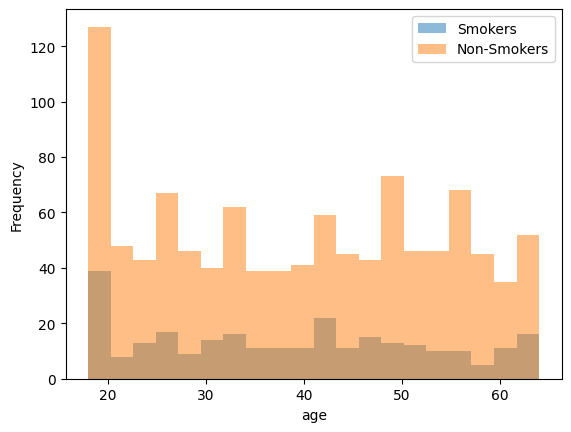

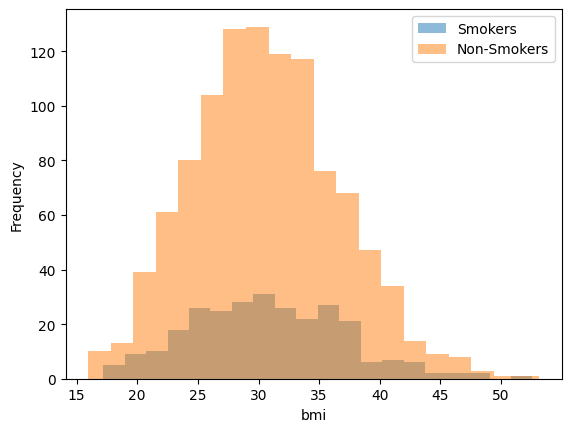

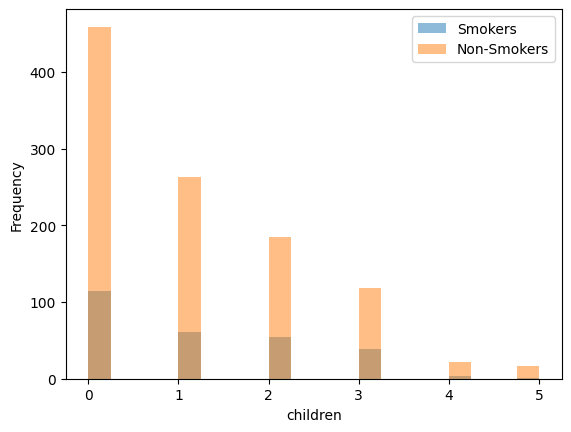

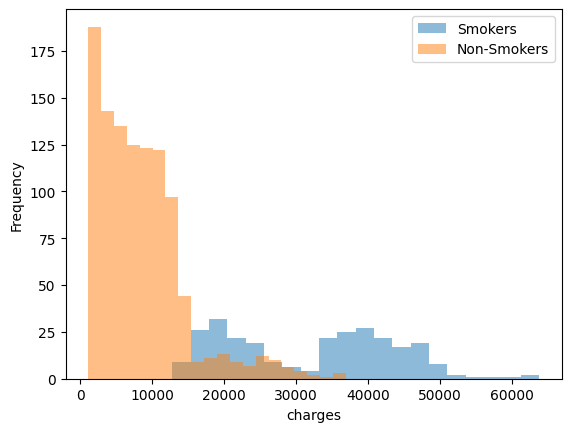

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame 'data' with features and target variable
# Each column represents a feature, and the last column is the target variable

# Separate data for smokers and non-smokers
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

# List of numerical features
numerical_features = ["age","bmi"	,"children",	"charges"]  

# Plot histograms or density plots for each numerical feature
for feature in numerical_features:
    plt.figure()
    plt.hist(smokers[feature], bins=20, alpha=0.5, label='Smokers')
    plt.hist(non_smokers[feature], bins=20, alpha=0.5, label='Non-Smokers')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


smokers pay more charges than no smokers

In [ ]:
# We can group the dataframe by smoker on the median Value
median_group = df.groupby('smoker').median()
print(median_group)

         age      bmi  children      charges
smoker                                      
no      40.0  30.3050       1.0   7345.40530
yes     38.0  30.4475       1.0  34456.34845


<ipython-input-7-be7f17de9b79>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_group = df.groupby('smoker').median()


Bases on the values that we got we can see that charges have a significant impact on the smoker column

Now let's see if the gender influences being a smoker or not.


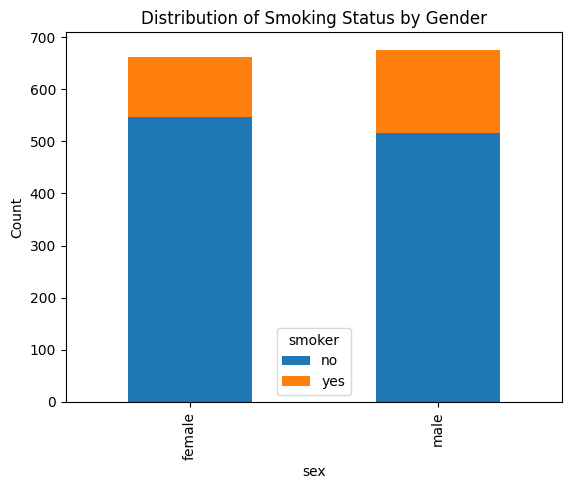

In [ ]:
cross_tab = pd.crosstab(df['sex'], df['smoker'])

# Plot the distributions using a bar plot
cross_tab.plot(kind='bar', stacked=True)

# Set the plot labels and title
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status by Gender')

# Show the plot
plt.show()

In [ ]:
# Null Hypothesis (H0): Two variables are independent.
# Alternate Hypothesis (H1): Two variables are not independent.
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(df['sex'], df['smoker'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_tab)

# Print the p-value
print('P-value:', p_value)

P-value: 0.006548143503580696


p-value < 0.05 ,so gender has an effect on smoking

Doing the same for the column 'region'

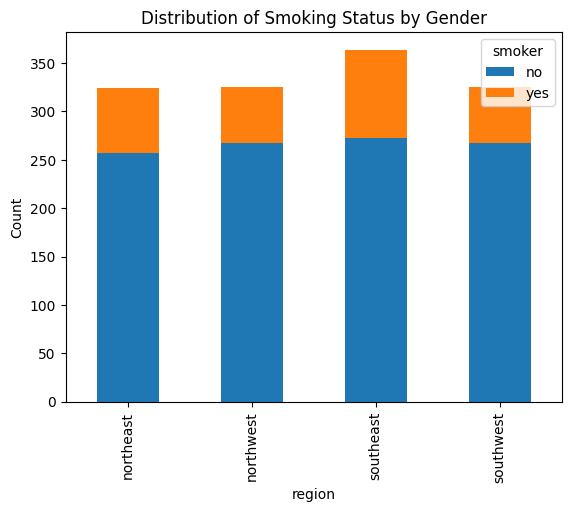

In [ ]:
cross_tab = pd.crosstab(df['region'], df['smoker'])

# Plot the distributions using a bar plot
cross_tab.plot(kind='bar', stacked=True)

# Set the plot labels and title
plt.xlabel('region')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status by Gender')

# Show the plot
plt.show()

In [ ]:
# Null Hypothesis (H0): Two variables are independent.
# Alternate Hypothesis (H1): Two variables are not independent.
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(df['region'], df['smoker'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_tab)

# Print the p-value

print('P-value:', p_value)

P-value: 0.06171954839170541


p-value > 0.05 ,so region doesnt have an effect on smoking

## Data preprocessing

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Drop rows with missing values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

See the type of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
sex_mapping = {'female': 0, 'male': 1}
df['sex'] = df['sex'].map(sex_mapping)

And now the smokers column

In [ ]:
smoker_mapping = {'no': 0, 'yes': 1}
df['smoker'] = df['smoker'].map(smoker_mapping)

I wont use the "region" column since it doesnt have an effect on smoker.

In [ ]:
df=df.drop("region",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   int64  
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   int64  
 5   charges   1335 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 73.0 KB


#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
column_max = df.max()
df = df.div(column_max)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,0.296875,0.0,0.525127,0.0,1.0,0.264777
1,0.281250,1.0,0.635611,0.2,0.0,0.027059
2,0.437500,1.0,0.621118,0.6,0.0,0.069773
3,0.515625,1.0,0.427348,0.0,0.0,0.344744
4,0.500000,1.0,0.543572,0.0,0.0,0.060637


## 4. Model Training & Testing



In [ ]:
from sklearn.model_selection import train_test_split
X = df[["charges","sex"]]  # Features (input variables)
y = df['smoker']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of training and testing data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1068, 2)
Testing data shape: (267, 2)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [ ]:
log = LogisticRegression()

log.fit(X_train, y_train)

LogisticRegression()

#### Evaluation

Evaluate our model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Assuming you have X_test and y_test from the previous code
# Get predictions on the testing data
y_pred = log.predict(X_test)
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
# Compute precision
precision = precision_score(y_test, y_pred)
# Compute recall
recall = recall_score(y_test, y_pred)
# Compute F1 score
f1 = f1_score(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.898876404494382
Precision: 0.8958333333333334
Recall: 0.6615384615384615
F1 Score: 0.7610619469026548


##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plotting a histogram that shows the numbers of smokers and non smokers

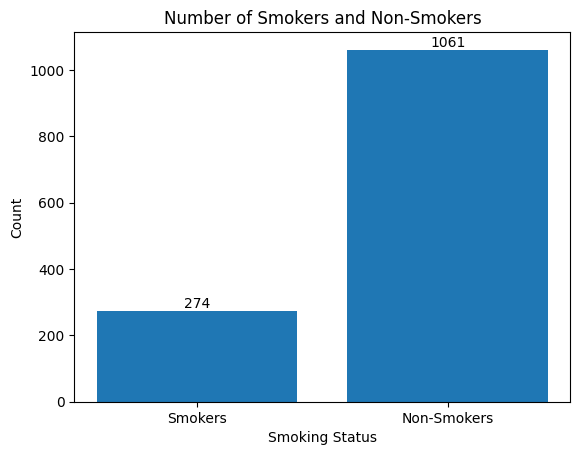

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame 'data' with the target variable 'smoke'

# Count the number of smokers and non-smokers
smoker_count = df[df['smoker'] == 1].shape[0]
non_smoker_count = df[df['smoker'] == 0].shape[0]

# Create a list of labels
labels = ['Smokers', 'Non-Smokers']

# Create a list of counts
counts = [smoker_count, non_smoker_count]

# Plot the histogram
plt.bar(labels, counts)

# Add labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Number of Smokers and Non-Smokers')
# Add count values on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
np.random.seed(42) #setting a random seed so we get the same data when we resample

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have X_train and y_train from the previous code

# Define the oversampler and undersampler
oversampler = RandomOverSampler(sampling_strategy=0.5)
undersampler = RandomUnderSampler()

# Perform oversampling on the training data
X1, y1 = oversampler.fit_resample(X, y)

# Perform undersampling on the training data
X2, y2 = undersampler.fit_resample(X1, y1)

# Print the count of the target variable before and after resampling
print("Before resampling:")
print(y.value_counts())
print("\nAfter resampling:")
print(pd.Series(y2).value_counts())

Before resampling:
0.0    1061
1.0     274
Name: smoker, dtype: int64

After resampling:
0.0    530
1.0    530
Name: smoker, dtype: int64


Plot a new histogram on the new data we have.

df2 is our new dataframe

In [ ]:
df2 = np.concatenate((X2, y2.values.reshape(-1, 1)), axis=1)
df2 = pd.DataFrame(df2, columns=list(X2.columns) + ['smoker'])

In [ ]:
df2.head()

,charges,sex,smoker
0,0.144619,1.0,0.0
1,0.276401,0.0,0.0
2,0.037574,1.0,0.0
3,0.082382,1.0,0.0
4,0.225539,0.0,0.0


Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [ ]:
from sklearn.model_selection import train_test_split
X = df2[["charges","sex"]]  # Features (input variables)
y = df2['smoker']  # Target variable

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of training and testing data
print("Training data shape:", X_train2.shape)
print("Testing data shape:", X_test2.shape)


Training data shape: (848, 2)
Testing data shape: (212, 2)


In [ ]:
log2 = LogisticRegression()

log2.fit(X_train2, y_train2)

LogisticRegression()

Asses our model on the testing data, and Compute the same metrics you computed before

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Assuming you have X_test and y_test from the previous code
# Get predictions on the testing data
y_pred2 = log2.predict(X_test2)
# Compute accuracy
accuracy = accuracy_score(y_test2, y_pred2)
# Compute precision
precision = precision_score(y_test2, y_pred2)
# Compute recall
recall = recall_score(y_test2, y_pred2)
# Compute F1 score
f1 = f1_score(y_test2, y_pred2)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9056603773584906
Precision: 0.883495145631068
Recall: 0.9191919191919192
F1 Score: 0.9009900990099011


We can see how much our scores got better when we balanced our dataset.

####Regularization with Hyperparameter Tuning

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

Print the best score and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# Create the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Print the best score and best parameters
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Score: 0.935085276714236
Best Parameters: {'C': 10, 'penalty': 'l1'}


Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [ ]:
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test2)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test2, y_pred)
recall = recall_score(y_test2, y_pred)
precision = precision_score(y_test2, y_pred)
f1 = f1_score(y_test2, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)

Accuracy: 0.9150943396226415
Recall: 0.9393939393939394
Precision: 0.8857142857142857
F1-Score: 0.9117647058823529


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods using Adaboost.



Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier model with n_estimators=10
adaboost_model = AdaBoostClassifier(n_estimators=10)

# Fit the model on the training data
adaboost_model.fit(X_train2, y_train2)

AdaBoostClassifier(n_estimators=10)

Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [ ]:
y_pred = adaboost_model.predict(X_test2)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test2, y_pred)
recall = recall_score(y_test2, y_pred)
precision = precision_score(y_test2, y_pred)
f1 = f1_score(y_test2, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)

Accuracy: 0.9386792452830188
Recall: 0.98989898989899
Precision: 0.8909090909090909
F1-Score: 0.937799043062201


We can tune the Hyperparameters of the Adaboost algorithm, and build an even more powerful model 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
grid = {'n_estimators' : [5,8,9,11,12,15], 'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],'algorithm' : ['SAMME', 'SAMME.R']}
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, cv=5, scoring='accuracy')

In [ ]:
grid_result = grid_search.fit(X_train2, y_train2)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.948075 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 15}


In [ ]:
best_model = grid_result.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test2)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test2, y_pred)
precision = precision_score(y_test2, y_pred)
recall = recall_score(y_test2, y_pred)
f1 = f1_score(y_test2, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9386792452830188
Precision: 0.8909090909090909
Recall: 0.98989898989899
F1 Score: 0.937799043062201


We got the same results as above

## Hyperparameter tuning with all the features except region

In [ ]:
df3=df.copy() 

In [ ]:
df3.head()

,age,sex,bmi,children,smoker,charges
0,0.296875,0.0,0.525127,0.0,1.0,0.264777
1,0.281250,1.0,0.635611,0.2,0.0,0.027059
2,0.437500,1.0,0.621118,0.6,0.0,0.069773
3,0.515625,1.0,0.427348,0.0,0.0,0.344744
4,0.500000,1.0,0.543572,0.0,0.0,0.060637


### Resampling df3

In [ ]:
X=df3.drop("smoker",axis=1)
y=df3["smoker"]

Resampling df3

In [ ]:
np.random.seed(15)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have X_train and y_train from the previous code

# Define the oversampler and undersampler
oversampler = RandomOverSampler(sampling_strategy=0.5)
undersampler = RandomUnderSampler()

# Perform oversampling on the training data
X1, y1 = oversampler.fit_resample(X, y)

# Perform undersampling on the training data
X3, y3= undersampler.fit_resample(X1, y1)

# Print the count of the target variable before and after resampling
print("Before resampling:")
print(y.value_counts())
print("\nAfter resampling:")
print(pd.Series(y3).value_counts())

Before resampling:
0.0    1061
1.0     274
Name: smoker, dtype: int64

After resampling:
0.0    530
1.0    530
Name: smoker, dtype: int64


In [ ]:
df3 = np.concatenate((X3, y3.values.reshape(-1, 1)), axis=1)
df3 = pd.DataFrame(df3, columns=list(X3.columns) + ['smoker'])

In [ ]:
df3.smoker.value_counts()

0.0    530
1.0    530
Name: smoker, dtype: int64

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.15, random_state=101)

### model with only 1 estimator

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
model = AdaBoostClassifier(n_estimators=1)

In [ ]:
model.fit(X_train3,y_train3)

AdaBoostClassifier(n_estimators=1)

In [ ]:
predictions = model.predict(X_test3)

In [ ]:
accuracy1 = accuracy_score(y_test3, predictions)
precision1 = precision_score(y_test3, predictions)
recall1 = recall_score(y_test3, predictions)
f1_1= f1_score(y_test3, predictions)

# Print the evaluation metrics
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_1)

Accuracy: 0.949685534591195
Precision: 0.9041095890410958
Recall: 0.9850746268656716
F1 Score: 0.9428571428571428


In [ ]:
print(classification_report(y_test3,predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96        92
         1.0       0.90      0.99      0.94        67

    accuracy                           0.95       159
   macro avg       0.95      0.95      0.95       159
weighted avg       0.95      0.95      0.95       159



We got some good results

In [ ]:
model.feature_importances_

array([0., 0., 0., 0., 1.])

In [ ]:
model.feature_importances_.argmax()

4

In [ ]:
X3.columns[4]

'charges'

If we have only 1 estimator our most important feature is charges

## Now we will take a range of estimator between 1 and 15 and fit a model for each estimator and than we will plot the error for each estimator.

In [ ]:
error_rates = []

for n in range(1,15):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train3,y_train3)
    preds = model.predict(X_test3)
    err = 1 - accuracy_score(y_test3,preds)
    
    error_rates.append(err)

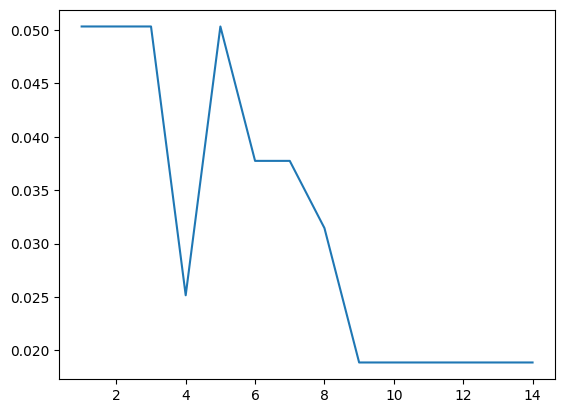

In [ ]:
plt.plot(range(1,15),error_rates)

 our lowest error is somewhere around 10

In [ ]:
model.feature_importances_

array([0.14285714, 0.07142857, 0.42857143, 0.        , 0.35714286])

As we can see for n_estimators = 14 the importance of the features shift as more are allowed to be added in

In [ ]:
feats = pd.DataFrame(index=X3.columns,data=model.feature_importances_,columns=['Importance'])

In [ ]:
feats = feats.sort_values("Importance")
feats

,Importance
children,0.000000
sex,0.071429
age,0.142857
charges,0.357143
bmi,0.428571


We can visualize the feature importances

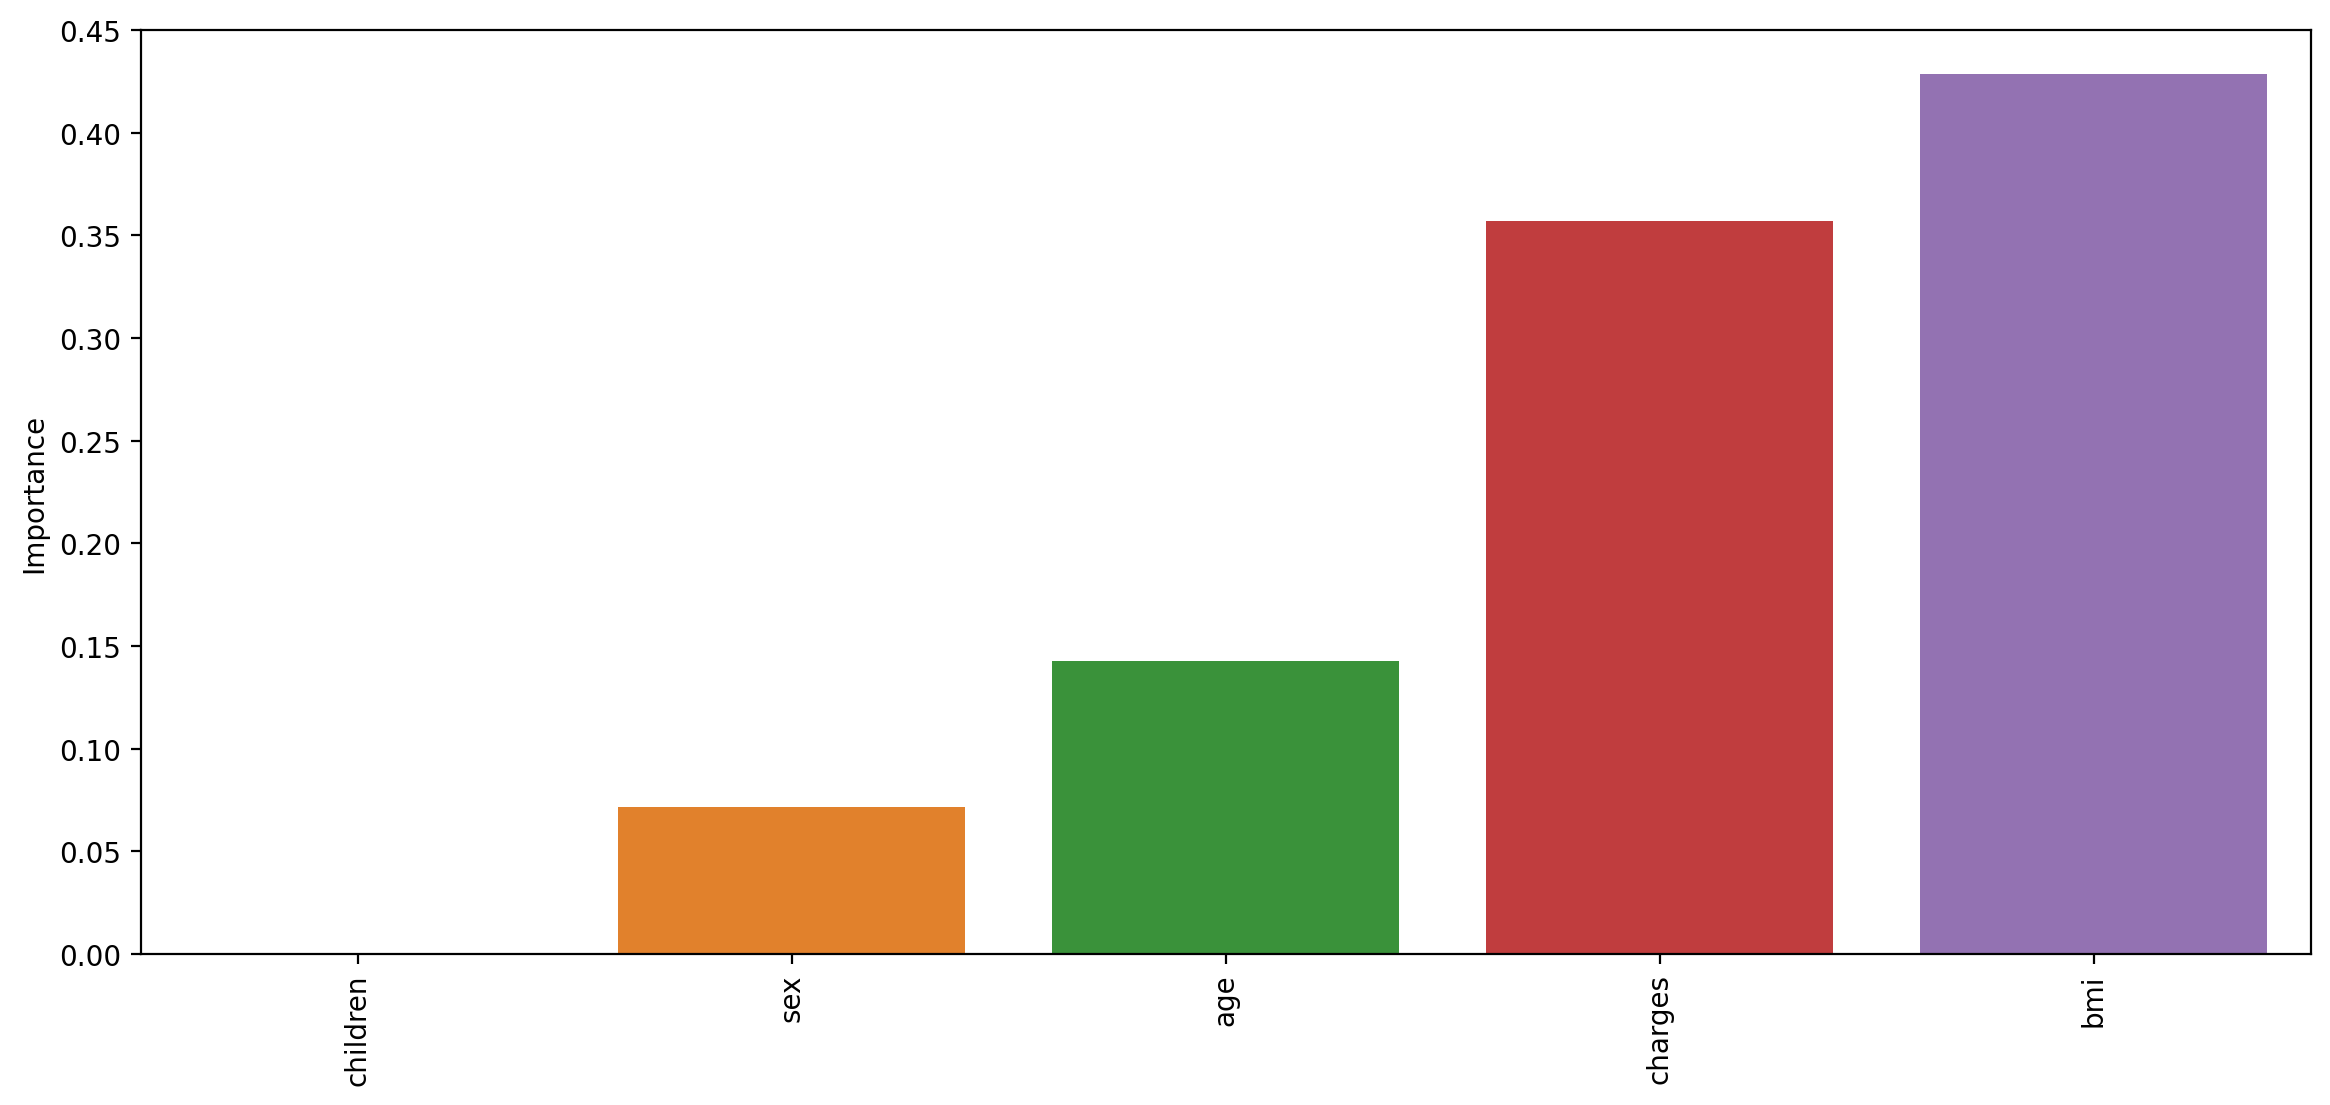

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feats.sort_values('Importance'),x=feats.index,y='Importance')

plt.xticks(rotation=90);

Since the lowest error that we got above is around 10, we can use this value and put it in our gridsearch

In [ ]:
grid = {'n_estimators' : [10], 'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],'algorithm' : ['SAMME', 'SAMME.R']}
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, cv=5, scoring='accuracy')

In [ ]:
grid_result = grid_search.fit(X_train3, y_train3)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.972253 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 10}


In [ ]:
best_model = grid_result.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test3)

# Calculate evaluation metrics
accuracy2 = accuracy_score(y_test3, y_pred)
precision2 = precision_score(y_test3, y_pred)
recall2 = recall_score(y_test3, y_pred)
f1_2 = f1_score(y_test3, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f1_2)

Accuracy: 0.9811320754716981
Precision: 0.9571428571428572
Recall: 1.0
F1 Score: 0.9781021897810218


### Those are the highest scores we got so far.

## Comparing ML Models using Z-test

### Now we will compare the performance of the last 2 models

Null Hypothesis H0: The two models perform the same

Alternate Hypothesis H1: The two models do not perform the same

In [ ]:
#compute variances of each model
var1 = accuracy1*(1-accuracy1)/len(X_test3) #The fold size is the number of examples in the test set
var2 = accuracy2*(1-accuracy2)/len(X_test3)

#compute z-score
z = (accuracy1 - accuracy2)/np.sqrt(var1 + var2)
print(z)

z_alpha_over_2 = 1.96 #This value is for a 95% confidence level

if abs(z) < z_alpha_over_2:
  print('The z value is smaller than the Z threshold, which means we DO NOT reject the null hypothesis.')
else:
  print('The z value is greater than the Z threshold, which means we REJECT the null hypothesis. The linear model is indeed better than the non-linear model.')

-1.540038433639987
The z value is smaller than the Z threshold, which means we DO NOT reject the null hypothesis.


## The 2 models perform the same

## Comparing the 2 models using McNemar test  https://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/

Another way to compare the models is using McNemar test

In [ ]:
from mlxtend.evaluate import mcnemar
from mlxtend.evaluate import mcnemar_table
tb = mcnemar_table(y_target=y_test3,     #y_test3 is the initial target
                   y_model1=predictions, #predictions is the predicted values of the first model(with n_estimator =1)
                   y_model2=y_pred)      ##y_pred is the predicted values of the second model(with hyperparameter tuning)
print(tb)

[[151   5]
 [  0   3]]


In [ ]:
from mlxtend.evaluate import mcnemar
# https://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/
chi2, p = mcnemar(ary=tb, exact=True)# we use exact = True because b+c <25 
print('chi-squared:', chi2)
print('p-value:', p)

chi-squared: 0
p-value: 0.0625


p value > 0.05

## We cannot reject the null hypothesis , both models perform the same.